# Exercício 6 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100 amostras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [3]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9596045613288879, 5.370344527896322e-16)

In [4]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/SixthMixture100Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2         3
0  0.735513  0.983709 -0.910918  0.399210
1 -0.710789  1.000000 -0.000372  0.284728
2  0.928515  0.999991  0.503530 -0.004221
3 -0.750095  1.000000  0.310360  0.571793
4  0.045545  0.304480 -0.909322 -0.357131


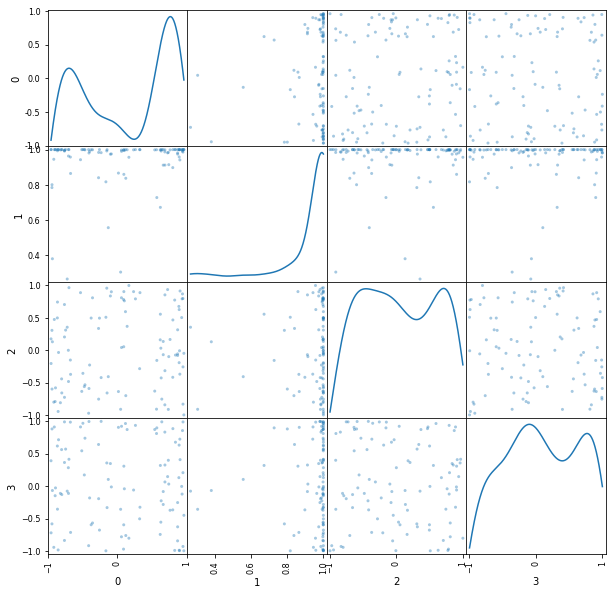

In [5]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [6]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.4608,0.8962,9.3898e-07
1,1.277,11.983,0.4586,1.7347e-17
2,0,0.4175,0.9355,0.00010311
3,0,0.2361,0.9325,6.9472e-05


## NPCA-RLS Algorithm

In [7]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures,runs = 1)

Execution time: 0.01850271224975586 seconds


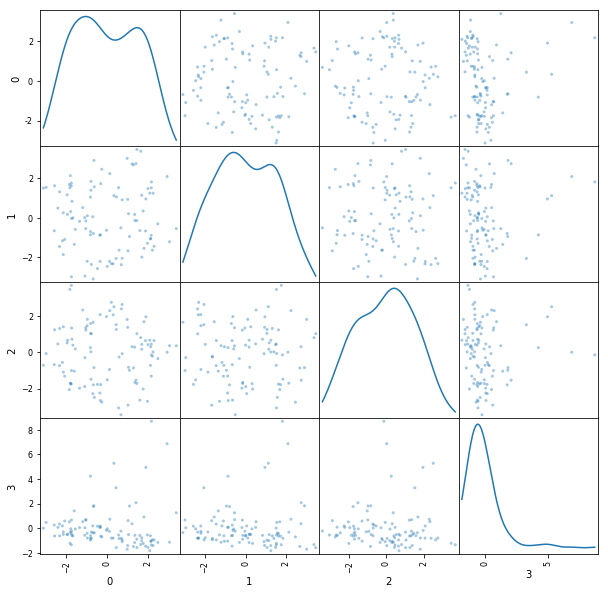

In [8]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,24.6312,0.9627,0.0062908
1,0,0.0789,0.9766,0.072636
2,0,0.2304,0.9854,0.33767
3,0.6844,1.1153,0.7025,6.1763e-13


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


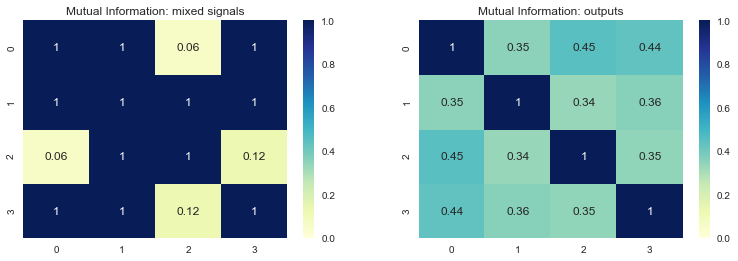

In [9]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [10]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-1, decayRate = 1e-7, runs  = 1) 

Execution time: 0.01050114631652832 seconds


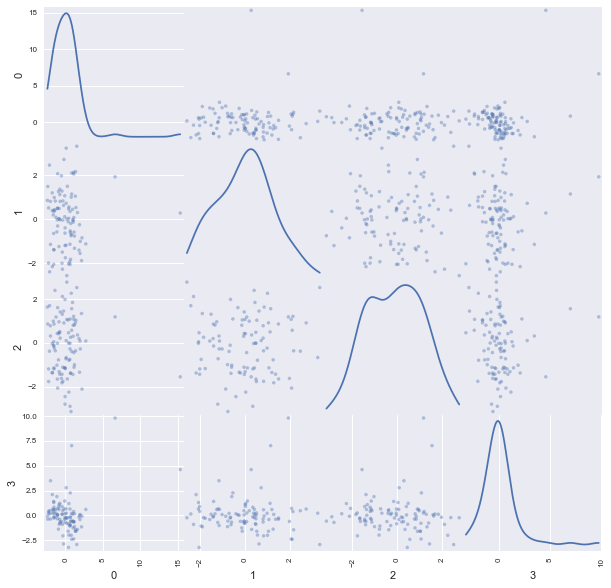

In [11]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.991,1.5768,0.6705,1.1696e-13
1,0,0.1363,0.9836,0.24929
2,0.0758,0.0665,0.9859,0.36869
3,0.7167,1.3104,0.791,1.3182e-10


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


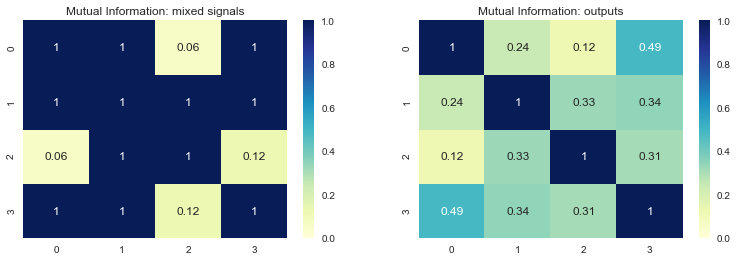

In [12]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [13]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-9, runs = 1)

Execution time: 0.01850128173828125 seconds


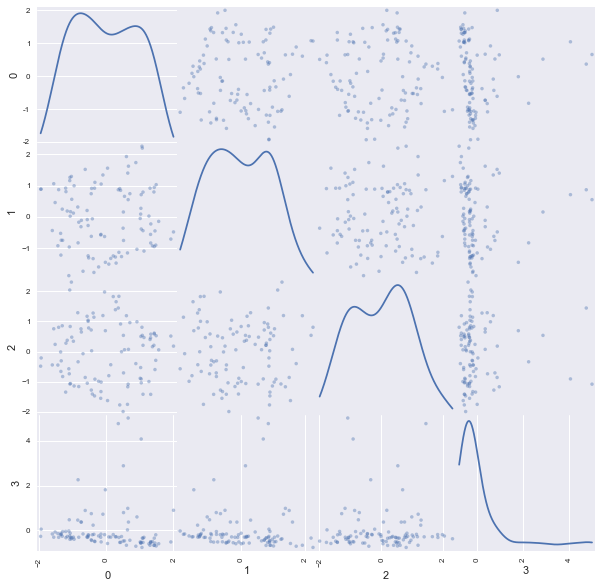

In [14]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.2973,0.9603,0.0042447
1,0,0.1049,0.9717,0.029711
2,0,0.335,0.977,0.076876
3,1.0701,1.5747,0.559,7.647e-16


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


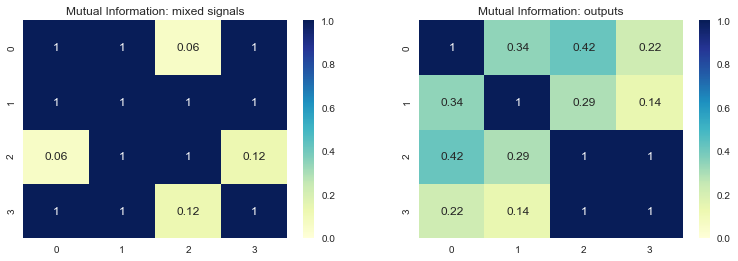

In [15]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)